### Execture cells with SHIFT-ENTER

This cell loads the necessary libraries. The logging output of datajoint will disappear in future versions. 

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import datajoint as dj
from pprint import pprint 
dj.config['loglevel'] = 'INFO'
from pipeline import rf, pre, lib
import numpy as np

INFO:root:Setting loglevel to INFO


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Look at possible keys (can be skipped)

This cell can be used to find the key that is to be populated. 

In [5]:
rf.Scan()-rf.Eye() & dict(animal_id=2054)

DEBUG:datajoint.connection:Executing SQL:SELECT count(*) FROM `pipeline_rf`.`_eye`
DEBUG:datajoint.relational_operand:SELECT `animal_id`,`session`,`scan_idx`,`file_num`,`site`,`depth`,`laser_wavelength`,`laser_power`,`cortical_area`,`scan_notes`,`scan_ts` FROM `pipeline_rf`.`scan` WHERE (`animal_id`=2054) AND ((`animal_id`,`session`,`scan_idx`) not in (SELECT `animal_id`,`session`,`scan_idx` FROM `pipeline_rf`.`_eye`)) LIMIT 7
DEBUG:datajoint.connection:Executing SQL:SELECT `animal_id`,`session`,`scan_idx`,`file_num`,`site`,`depth`,`laser_wavelength`,`laser_power`,`cortical_area`,`scan_notes`,`scan_ts` FROM `pipeline_rf`.`scan` WHERE (`animal_id`=2054) AND ((`animal_id`,`session`,`scan_idx`) not in (SELECT `animal_id`,`session`,`scan_idx` FROM `pipeline_rf`.`_ey
DEBUG:datajoint.connection:Executing SQL:SELECT count(*) FROM `pipeline_rf`.`scan` WHERE (`animal_id`=2054) AND ((`animal_id`,`session`,`scan_idx`) not in (SELECT `animal_id`,`session`,`scan_idx` FROM `pipeline_rf`.`_eye`))


animal_id,session,scan_idx,file_num,site,depth,laser_wavelength,laser_power,cortical_area,scan_notes,scan_ts
2054,1,2,2,1,150,920.0,40.0,unknown,,2016-01-18 14:13:11
2054,1,4,4,2,150,920.0,50.0,unknown,"same site as site 1, just larger FOV",2016-01-18 14:13:43
2054,1,9,9,6,450,920.0,80.0,unknown,"GVD 4000, no HD5 file, spontaneous activity. May not have full water for this scan.",2016-01-18 18:01:28
2054,1,10,10,7,450,920.0,80.0,unknown,"GVD 4000, no HD5 file, spontaneous activity. Replaced water before this scan.",2016-01-18 18:02:23


### Set the values of key to the desired session 

Change the values of the dictionary to target the desired session and scan. `rf.Eye().new_eye(key)` will load the time stamps and a few frames to select the ROI.

In [6]:
key = dict(animal_id=2054, session=1, scan_idx=2)
eye_time, frames = rf.Eye().new_eye(key)

DEBUG:datajoint.connection:Executing SQL:SHOW TABLES in `pipeline_rf`LIKE "session"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `session` IN `pipeline_rf`
DEBUG:datajoint.relational_operand:SELECT `animal_id`,`session`,`hd5_path`,`file_base` FROM `pipeline_rf`.`session` WHERE (`session`=1 AND `animal_id`=2054)
DEBUG:datajoint.connection:Executing SQL:SELECT `animal_id`,`session`,`hd5_path`,`file_base` FROM `pipeline_rf`.`session` WHERE (`session`=1 AND `animal_id`=2054)
DEBUG:datajoint.relational_operand:SELECT `animal_id`,`session`,`scan_idx`,`file_num` FROM `pipeline_rf`.`scan` WHERE (`session`=1 AND `scan_idx`=2 AND `animal_id`=2054)
DEBUG:datajoint.connection:Executing SQL:SELECT `animal_id`,`session`,`scan_idx`,`file_num` FROM `pipeline_rf`.`scan` WHERE (`session`=1 AND `scan_idx`=2 AND `animal_id`=2054)
/data/pipeline/python/pipeline/rf.py:44: UserWarning: 8100 timestamps, but 8001  movie frames.
  warnings.warn("{total_frames} timestamps, but {no_frames}  mov

### Execute next cell and draw a rectangle around ROI

This cell selects the region of interest. Draw a rectangle around the entire eye. When done simply execute the next cell below. 

<IPython.core.display.Javascript object>


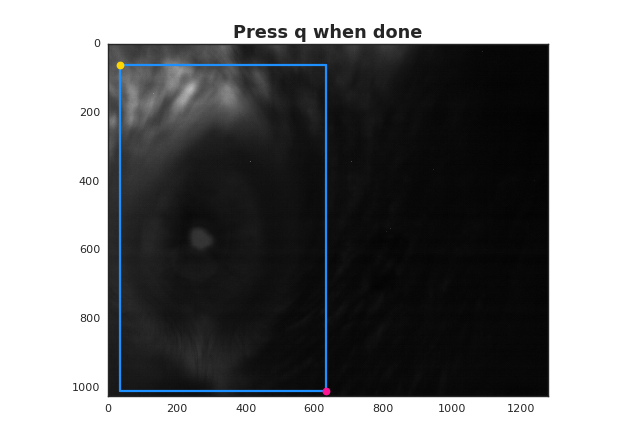

In [7]:
rg = lib.ROIGrabber(frames.mean(axis=2))

### Insert results into database

In [ ]:
key['eye_time'] = eye_time
key['eye_roi'] = rg.roi
pprint(key)
#rf.Eye().insert1(key)
